# Multi-Pendulum Development

In [2]:
import numpy as np
import pandas as pd
import sympy as sp
from scipy.integrate import solve_ivp
from MathFunctions import *
from DoublePendulumSubclass import DoublePendulumExplorer

In [3]:
# Declare variables & constants
t = sp.Symbol("t")
l1, l2, m1, m2, M1, M2, g = sp.symbols('l1 l2 m1 m2 M1 M2 g', real=True, positive=True)

# Declare functions
theta1 = sp.Function('theta1')(t)
theta2 = sp.Function('theta2')(t)
p_theta_1 = sp.Function('p_theta_1')(t)
p_theta_2 = sp.Function('p_theta_2')(t)

In [4]:
# Define parameters
params = {
    m1: 1,    # mass1
    m2: 1,    # mass2
    M1: 1,    # compound mass1
    M2: 1,    # compound mass2
    l1: 1,    # length1
    l2: 1,    # length2
    g : 9.81  # acceleration due to gravity
}

# using (time end - time start) * 200
# Is this enough/too much??
time = [0, 120, 24000]

In [5]:
# Instantiate DoublePendulumExplorer
simple_explorer = DoublePendulumExplorer(params, time, 'simple')
compound_explorer = DoublePendulumExplorer(params, time, 'compound')

DoublePendulumExplorer initialized with base class.
DoublePendulumExplorer initialized with base class.


----
&nbsp;
## Creating data dictionary and testing in Pandas

### Simple model

`Below Runtime approx: 2.5 mins`

In [6]:
simple_explorer.get_simulation_data(integrator=solve_ivp)

Simulations Complete.
Positions calculated and stored.


In [7]:
simple_dict = simple_explorer.simulation_data_dict
simple_df = pd.DataFrame(simple_dict[180])

print(simple_df.info())
simple_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   theta1  24000 non-null  float64
 1   theta2  24000 non-null  float64
 2   omega1  24000 non-null  float64
 3   omega2  24000 non-null  float64
 4   x1      24000 non-null  float64
 5   y1      24000 non-null  float64
 6   x2      24000 non-null  float64
 7   y2      24000 non-null  float64
dtypes: float64(8)
memory usage: 1.5 MB
None


,theta1,theta2,omega1,omega2,x1,y1,x2,y2
0,0.000000e+00,-1.568612,0.000000e+00,0.000000,0.000000e+00,-1.0,-0.999998,-1.002185
1,-1.377188e-07,-1.568489,9.035406e-09,0.049052,-1.377188e-07,-1.0,-0.999997,-1.002307
2,-5.959756e-07,-1.568121,7.713434e-08,0.098104,-5.959756e-07,-1.0,-0.999997,-1.002675
3,-1.510659e-06,-1.567508,5.647393e-07,0.147155,-1.510659e-06,-1.0,-0.999996,-1.003288
4,-3.108812e-06,-1.566649,1.966836e-06,0.196206,-3.108812e-06,-1.0,-0.999995,-1.004147


#### Convert to JSON 

In [11]:
import json

# Function to convert NumPy arrays to lists
def numpy_to_list(data):
    if isinstance(data, np.ndarray):
        return data.tolist()
    elif isinstance(data, dict):
        return {k: numpy_to_list(v) for k, v in data.items()}
    else:
        return data

In [ ]:
# Convert the simulation data to a JSON-serializable format
json_ready_data = {k: numpy_to_list(v) for k, v in simple_explorer.simulation_data_dict.items()}

# Serialize to a JSON file
with open('../JSONdata/simple_data.json', 'w') as jsonfile:
    json.dump(json_ready_data, jsonfile, indent=4)

----
&nbsp;
### Compound model

`Below Runtime approx: 2.5 mins`

In [8]:
compound_explorer.get_simulation_data(integrator=solve_ivp)

Simulations Complete.
Positions calculated and stored.


In [9]:
compound_dict = compound_explorer.simulation_data_dict
compound_df = pd.DataFrame(compound_dict[180])

print(compound_df.info())
compound_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   theta1  24000 non-null  float64
 1   theta2  24000 non-null  float64
 2   omega1  24000 non-null  float64
 3   omega2  24000 non-null  float64
 4   x1      24000 non-null  float64
 5   y1      24000 non-null  float64
 6   x2      24000 non-null  float64
 7   y2      24000 non-null  float64
dtypes: float64(8)
memory usage: 1.5 MB
None


,theta1,theta2,omega1,omega2,x1,y1,x2,y2
0,0.000000e+00,-1.568612,0.000000e+00,0.000000,0.000000e+00,-1.0,-0.999998,-1.002185
1,-7.054951e-08,-1.568507,1.801382e-09,0.024526,-7.054951e-08,-1.0,-0.999997,-1.002290
2,-3.020726e-07,-1.568191,1.403425e-08,0.049052,-3.020726e-07,-1.0,-0.999997,-1.002605
3,-7.541794e-07,-1.567666,5.051741e-08,0.073578,-7.541794e-07,-1.0,-0.999996,-1.003131
4,-1.526200e-06,-1.566930,1.337194e-07,0.098104,-1.526200e-06,-1.0,-0.999994,-1.003867


#### Convert to JSON 

In [ ]:
# Convert the simulation data to a JSON-serializable format
json_ready_data = {k: numpy_to_list(v) for k, v in compound_explorer.simulation_data_dict.items()}

# Serialize to a JSON file
with open('../JSONdata/compound_data.json', 'w') as jsonfile:
    json.dump(json_ready_data, jsonfile, indent=4)

----
&nbsp;
### Plot testing

`simple`

In [10]:
simple_explorer.find_poincare_section(y_fixed=-1.75, time_interval=(0, 120), angle_interval=(-180, 180))

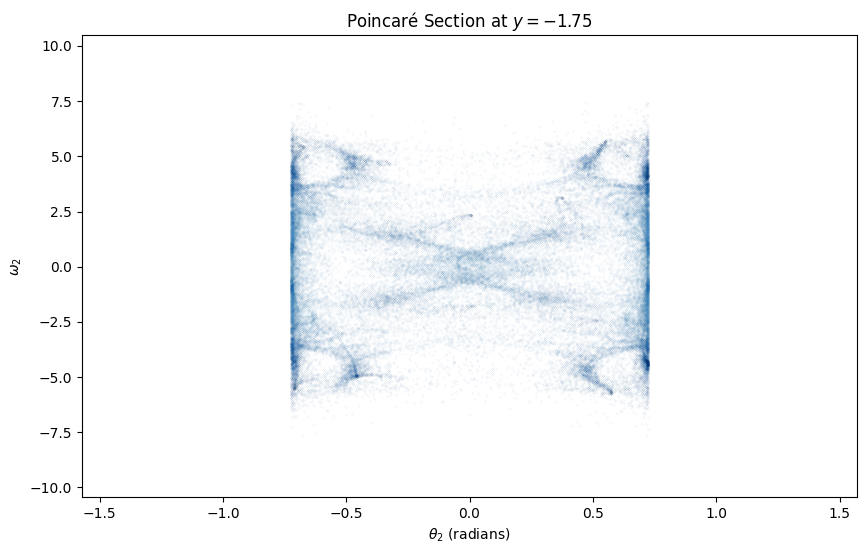

In [11]:
simple_explorer.plot_poincare_map()

`compound`

In [12]:
compound_explorer.find_poincare_section(y_fixed=-1.75, time_interval=(0, 120), angle_interval=(-180, 180))

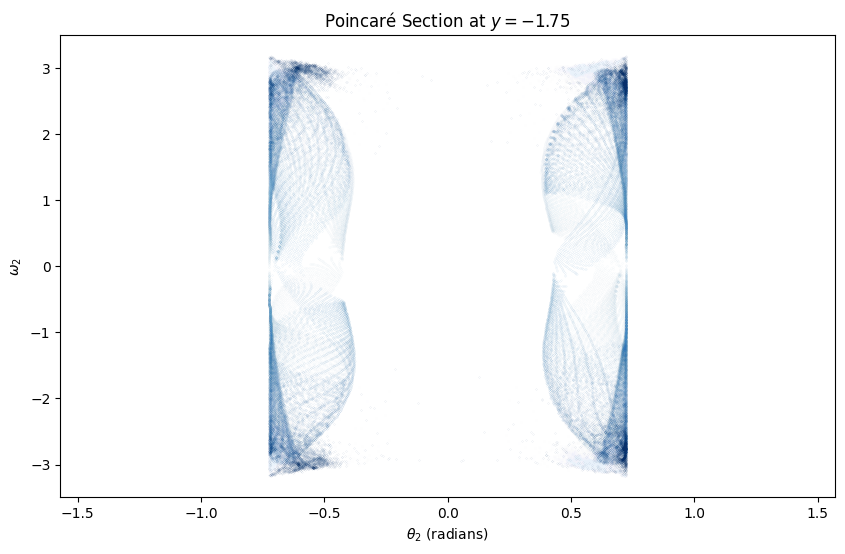

In [13]:
compound_explorer.plot_poincare_map()

### IDEA: 19/02/24

Record **points** $(x, y)$ that cross the plane rather than just focusing on the y-coordinate!

- If motion periodic, it was cross the fixed $yz$-plane at the same points every period. 
- If Lissajous curves then I'm not sure of the behaviour, nor how to record the point. The motion will be semi periodic. 
- If chaotic, then the $(x, y)$ crossing will appear almost random. 

#### STRATEGY

Rather than going for an enormous granular dataset, restrict it.
 - Less points, more $yz$ slices at regular intervals.
  - Glue together to give the portrait of the system as a whole. 


----
&nbsp;

### Current State of `DoublePendulumExplorer`

The `DoublePendulumExplorer` subclass extends `DoublePendulum`, focusing on exploring the dynamics of a double pendulum under various initial conditions, particularly varying `theta2` angles:

- **Running Simulations**: It can execute simulations across a predefined range of initial conditions.
- **Storing Positions**: Calculates and stores the positions $(x,y)$ of both pendulums for further analysis.


### Implemented Methods

- `_run_full_simulation_and_analysis`: Manages the full cycle of running simulations, calculating positions, and organizing the data.
- `_generate_initial_conditions`, `_run_simulations`, `_calculate_and_store_positions`: These methods collectively handle the simulation process.

We have added a class attribute, `get_simulation_data()` which calls all of the above and creates a dictionary `self.simulation_data_dict` which is indexed $\theta_2 \in [-\pi, \pi, \text{step}=0.5]$ $\implies$ each index represents $0.5 ^{\circ}$

The structure is:

```python
{0: {'theta1': array([ 0.00000000e+00,  6.00715702e-20,  2.40188874e-19, ...,
         -1.42244710e+00, -1.43566953e+00, -1.44593863e+00]),
  'theta2': array([-3.14159265, -3.14159265, -3.14159265, ..., 43.92106982,
         43.9840117 , 44.04642025]),
  'omega1': array([ 0.00000000e+00,  1.20118394e-17,  2.40061350e-17, ...,
         -1.47157868e+00, -1.17370579e+00, -8.80553174e-01]),
  'omega2': array([0.00000000e+00, 2.40256435e-17, 4.80278951e-17, ...,
         6.32831315e+00, 6.26317666e+00, 6.22103776e+00]),
  'x1': array([ 0.00000000e+00,  6.00715702e-20,  2.40188874e-19, ...,
         -9.89016419e-01, -9.90884258e-01, -9.92215399e-01]),
  'y1': array([-1.        , -1.        , -1.        , ..., -0.14780569,
         -0.13471595, -0.12453354]),
  'x2': array([-1.22464680e-16, -1.22404608e-16, -1.22224491e-16, ...,
         -1.05020550e+00, -9.89169705e-01, -9.28136239e-01]),
  'y2': array([ 0.        ,  0.        ,  0.        , ..., -1.14593189,
         -1.13471448, -1.12247836])}, 1: {..., }, 2: {..., } }
```

Although a good exercise is "How to" the two enormous 9GB datasets for `simple` and `compound` are way too granular. 
This dataset is unwieldy and will be **expensive** to host. 

See IDEA above for new strategy. 

The below are attempted implementations:

- `find_poincare_section`: Calculates the Poincaré section crossings.
- `plot_poincare_map`: Visualises the Poincaré section

Both require optimisation

### Outstanding Tasks

- **Poincaré Sections**: Identify and records the Poincaré section crossings based on a specific `y_fixed` value and within designated time and angle intervals.
- **Looping Trajectories**: Find them! that is, where $\theta_2>\pi$
- **Data Structure Optimization**: Explore database storage with MongoDB or something similar
- **Distinguishing Dense Regions**: Implementing a method to identify and visually distinguish dense regions of the Poincaré map, potentially indicating periodic orbits or other dynamic phenomena.
